In [390]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression, Ridge,  Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from sklearn.datasets import load_iris
from sklearn import tree

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [344]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [345]:
# code here
df = pd.read_csv('../data/bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Describe the dataset informations

In [346]:
# code here
df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [347]:
df['y_num'] = df['y'].map({'yes':1, 'no':0})

In [348]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


Use histogramms to display the features' distribution

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
 17  y_num      45211 non-null  int64 
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'y_num'}>, <Axes: >]], dtype=object)

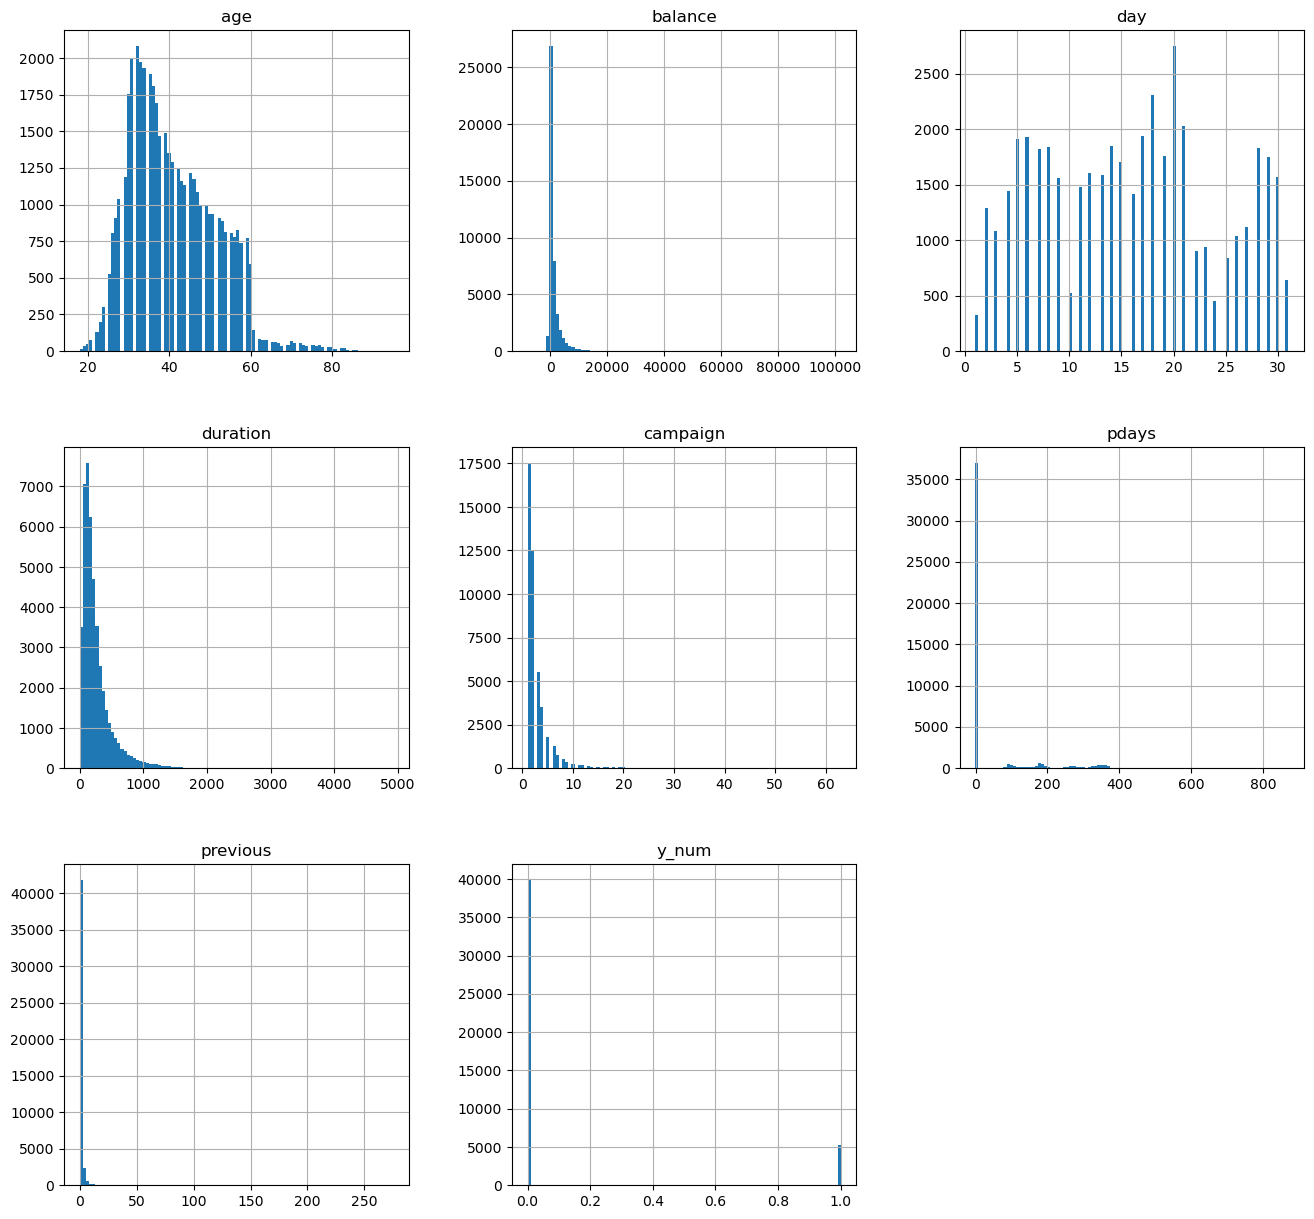

In [350]:
# code here

df.hist(bins=100,figsize=(16, 15))

Use heatmap to display the numerical features' correlation

<Axes: >

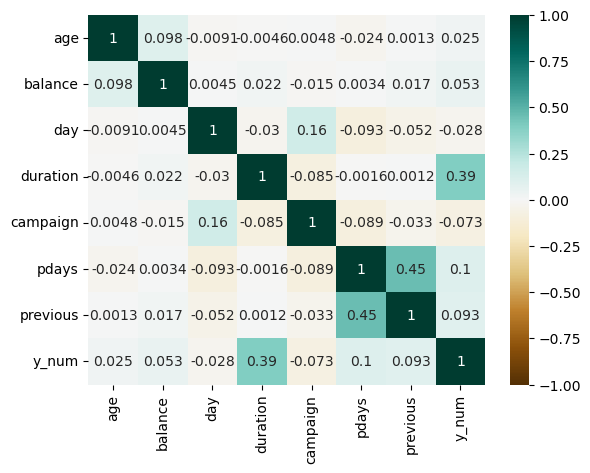

In [351]:
# code here
import numpy as np
import seaborn as sns

sns.heatmap(df.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the propoer hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe is good, maybe is wrong. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python datetime librairies for doing this preprocessing.
(the default year used will be 1984)

In [352]:
#code here
df['dayoftheyear'] = pd.to_datetime(df['day'].astype(str) + " " + df['month'] + ' 1984').dt.dayofyear
df = df.drop(columns=['day', 'month', 'duration', 'y_num'])

C:\Users\eduard.vlasov\AppData\Local\Temp\ipykernel_10716\3201591092.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dayoftheyear'] = pd.to_datetime(df['day'].astype(str) + " " + df['month'] + ' 1984').dt.dayofyear


We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. Now sort the features into categorical and numerical features

In [338]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numerical_features = ['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear']

After a first exploration, categorical/ordinal features (10 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

(You can also use the function `get_dummies` of pandas for categorical features)

In [317]:
# import and create the appropriate encoders 

# new_features = pd.get_dummies(df, columns=categorical_features, dtype=float)
# new_features

# X = new_features.drop(columns=['y'])
# y = new_features['y']

Now, the dataset needs to be split into two sets :
1. one corresponding to $ŷ$ 
2. the other corresponding to the $X$ matrix.

- Prepare the learning dataset

In [353]:
# Create the X and y DataFrames resample the dataframes if necessary

from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=['y'])
y = df['y']

le = LabelEncoder()
y = le.fit_transform(y)


At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Display the shape of X and y

In [452]:
# code here

print(X.shape)
print(y.shape)



(45211, 14)
(45211,)


Well done! The data is now ready to be splitted into sets and used to train models!

Hop hop hop!!! Not to fast!! You processed the data for machine learning, but are all the data useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it wants a pipeline easy to use and evaluate.
2. A model, that performs well.

Before beginning the modelling phase let's split the dataset into one training set and one testing set.

In [364]:
# train_test split
# X_train, X_test, y_train, y_test = None

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [384]:
# Decision tree model creation and tree visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline([
    # ('imputer', KNNImputer(n_neighbors=5)),
    #('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
    # ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
        ("numerical", numerical_transformer,numerical_features),
        ("categorical", categorical_transformer,categorical_features)
])

X_train_piped = preprocessor.fit_transform(X_train)
X_test_piped = preprocessor.transform(X_test)

columns_standartizated = preprocessor.get_feature_names_out()

X_train_transformed = pd.DataFrame(X_train_piped, columns=columns_standartizated)
X_test_transformed = pd.DataFrame(X_test_piped, columns=columns_standartizated)


In [398]:
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_transformed, y_train)
clf.score(X_train_transformed, y_train)

print("Mean Accuracy:",clf.score(X_train_transformed, y_train))
y_pred = clf.predict(X_test_transformed)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Accuracy: 0.8937656017947989
Accuracy: 0.8925833087584784


Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [386]:
# create a new train and test dataset with a different seed
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, random_state = 5, test_size = 0.3)


X_train_piped_2 = preprocessor.fit_transform(X_train_2)
X_test_piped_2 = preprocessor.transform(X_test_2)

columns_standartizated_2 = preprocessor.get_feature_names_out()

X_train_transformed_2 = pd.DataFrame(X_train_piped_2, columns=columns_standartizated_2)
X_test_transformed_2 = pd.DataFrame(X_test_piped_2, columns=columns_standartizated_2)

In [397]:
# Second tree creation
clf_2 = DecisionTreeClassifier(max_depth=3)
clf_2 = clf_2.fit(X_train_transformed_2, y_train)

print("Mean Accuracy:",clf_2.score(X_train_transformed_2, y_train))
y_pred_2 = clf_2.predict(X_test_transformed_2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Mean Accuracy: 0.8834012702625841
Accuracy: 0.8821881450899439


What can you tell about the two trees?

*answer here*

Normally, before creating a model, one or more evaluation metrics should be chosen depending of the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

In [402]:
# Cross validation on Decision trees
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, log_loss

score_list = []

accuracy_value = accuracy_score(y_test, y_pred)
precision_value = precision_score(y_test, y_pred)
recall_value = recall_score(y_test, y_pred)
f1_score_value = f1_score(y_test, y_pred)
auc_roc_value = roc_auc_score(y_test, y_pred)
confusion_matrix_value = confusion_matrix(y_test, y_pred)
mcc_value = matthews_corrcoef(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred)


score_list.append([accuracy_value, precision_value, recall_value, f1_score_value, auc_roc_value, confusion_matrix_value, mcc_value, log_loss_value])
score_list

[[0.8925833087584784,
  0.6584269662921348,
  0.18335419274092615,
  0.2868330885952031,
  0.5853257676056294,
  array([[11814,   152],
         [ 1305,   293]], dtype=int64),
  0.30884652188733913,
  3.8716899873152237]]

In [441]:
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'r2', 'neg_mean_absolute_error']



results =  {metric: cross_val_score(clf, X_train_transformed, y_train, scoring=metric, cv=5) for metric in metrics}
# print('\n'.join([f'{metric}: {result} (std: {result.std():.4f})' for metric, result in zip(metrics, results)]))


for metric, result in results.items():
    print(f'{metric}: {result.mean()} (std: {result.std():.4f})')

accuracy: 0.892975602913143 (std: 0.0010)
precision: 0.6452625388496622 (std: 0.0163)
recall: 0.1826066866893297 (std: 0.0085)
f1: 0.28453755560289773 (std: 0.0108)
roc_auc: 0.7179390417415552 (std: 0.0132)
r2: -0.03879334633337397 (std: 0.0101)
neg_mean_absolute_error: -0.10702439708685689 (std: 0.0010)


In [442]:
results

{'accuracy': array([0.89368088, 0.89336493, 0.8942961 , 0.89161005, 0.89192605]),
 'precision': array([0.65686275, 0.65686275, 0.66046512, 0.63265306, 0.61946903]),
 'recall': array([0.18157182, 0.18132612, 0.19241192, 0.16802168, 0.1897019 ]),
 'f1': array([0.28450106, 0.28419936, 0.2980063 , 0.26552463, 0.29045643]),
 'roc_auc': array([0.72846263, 0.72899152, 0.72853221, 0.7035282 , 0.70018065]),
 'r2': array([-0.03227462, -0.03412623, -0.02616066, -0.05223649, -0.04916874]),
 'neg_mean_absolute_error': array([-0.10631912, -0.10663507, -0.1057039 , -0.10838995, -0.10807395])}

Now process the output of your cross-validation in order to know the diversity in performances and the average performance

Plot your metrics performance

MEAN: [0.892975602913143, 0.6452625388496622, 0.1826066866893297, 0.28453755560289773, 0.7179390417415552, -0.03879334633337397, -0.10702439708685689]
STD: [0.0010352769349350269, 0.016276069140354076, 0.008507854285814506, 0.010752183807838232, 0.01317688286878558, 0.010121536990262133, 0.001035276934935036]


<BarContainer object of 7 artists>

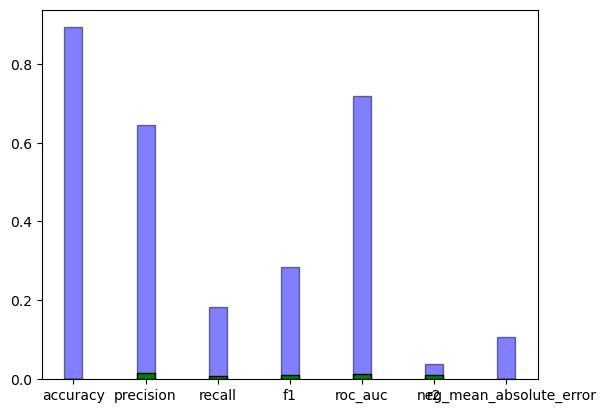

In [471]:
# performance plot

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'r2', 'neg_mean_absolute_error']
mean_values = []
std_values = []

for metric in metrics:
    mean = np.mean(results[metric])
    std = np.std(results[metric])

    mean_values.append(mean)
    std_values.append(std)
    
print(f'MEAN: {mean_values}')
print(f'STD: {std_values}')

width = 0.25

# plt.bar(metrics, mean_values, color='crimson', ec='black')

plt.bar(metrics, np.absolute(mean_values), color = 'b', 
        width = width, edgecolor = 'black', 
        label='MEAN',
        align='center',
        alpha=0.5) 

plt.bar(metrics, np.absolute(std_values), color = 'g', 
        width = width, edgecolor = 'black', 
        label='STD',
        align='center')

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [514]:
# Grid search
# forest_params = {'max_depth': list(range(5, 20)),'class_weight':['balanced', None], 'criterion':['gini', 'entropy'], 'min_samples_split':list(range(2, 11)),'random_state':[0, 5, 10]}
# GSCV = GridSearchCV(clf, forest_params, cv = 5, scoring='f1', n_jobs=-1)
# GSCV.fit(X_train_transformed, y_train)

# print(GSCV.best_params_)
# print(GSCV.best_score_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2, 'random_state': 0}
0.4369725451074168


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [516]:
# Test metrics

clf = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=6,
    class_weight='balanced', 
    min_samples_split=2, 
    random_state=0
)

clf = clf.fit(X_train_transformed, y_train)
y_pred_3 = clf.predict(X_test_transformed)
new = f1_score(y_test, y_pred_3)
old = f1_score(y_test, y_pred)
print(f'old = {old}, new = {new}')

old = 0.35172127747822485, new = 0.3781012917777322


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

From theses observations, what are your conclusions?  
In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [517]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [524]:
# gridsearch for the Random Forest classifier
rf = RandomForestClassifier(max_depth=3, random_state=0)

param_grid = {
    'max_depth': [5,10,15],
    'n_estimators': [10, 20, 30]
}

GSCV = GridSearchCV(rf, param_grid, cv = 5, n_jobs=-1, verbose = 2)
GSCV.fit(X_train_transformed, y_train)

print(GSCV.best_params_)
print(GSCV.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 10, 'n_estimators': 30}
0.8934178461341846


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

*answer here*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

In [ ]:
# training and display features' importance.
# tell them to use the RandomForest Object

What is the most important feature?

*Answer here*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [4]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features

We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*Answer here*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [ ]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [ ]:
# model building and evaluation

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [ ]:
# Test metrics

In [ ]:
# performance curves

## Let's Conclude

Report your test set metrics for the three methods here

In [ ]:
# Decision Tree on test set

In [ ]:
# Random forest on test set

In [ ]:
# XGBoost on test set

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

*answer here*

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

                                 `write memo here`

## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train an new model.

In [ ]:
# Write your code here

## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here